In [80]:
import os
print(os.listdir())

['.config', 'cconstruct_model.pdf', 'cconstruct_model', 'model.png', 'sample_data']


In [81]:
!pip install visualkeras
!pip install ann_visualizer
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

In [83]:
import tensorflow as tf
import os,sys
import numpy as np
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(2)

import numpy as np
np.random.seed(10)

import os, keras, numpy,tensorflow
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers import *
from tensorflow.keras import initializers

from keras.layers import *
from keras.layers import Dense
from keras.layers.core import Activation
from keras.initializers import RandomNormal
from keras.layers.convolutional import UpSampling2D
from keras.layers.core import Flatten
from keras.layers import Input
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.models import Model, Sequential
from keras.layers import add
from keras.layers import Conv2D, Conv2DTranspose, BatchNormalization

In [84]:
def DLModel(input_shape_in = (128, 128, 1)):
    
    input_shape = Input(shape = input_shape_in)
    
    model = Conv2D(64, (4,4), strides=(2,2), padding='same')(input_shape)
    model = LeakyReLU(alpha=0.2)(model)
    
    # C128
    model = Conv2D(128, (4,4), strides=(2,2), padding='same')(model)
    model = BatchNormalization()(model)
    model = LeakyReLU(alpha=0.2)(model)
    
    # C256
    model = Conv2D(256, (4,4), strides=(2,2), padding='same')(model)
    model = BatchNormalization()(model)
    model = LeakyReLU(alpha=0.2)(model)
    
    # C512
    model = Conv2D(512, (4,4), strides=(2,2), padding='same')(model)
    model = BatchNormalization()(model)
    model = LeakyReLU(alpha=0.2)(model)
    
    # second last output layer
    model = Conv2D(512, (4,4), strides=(2,2), padding='same')(model)
    model = BatchNormalization()(model)
    model = LeakyReLU(alpha=0.2)(model)
    
    # patch output
    model = Conv2D(512, (4,4), strides=(2,2), padding='same')(model)
    model = BatchNormalization()(model)
    model = LeakyReLU(alpha=0.2)(model)

    model = Flatten()(model)

    model = Dense(1, activation='relu')(model)
    
    # define model
    final_model = Model(inputs = input_shape, outputs = model)
    
    # compile model
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    final_model.compile(loss='binary_crossentropy', optimizer=opt, metrics = ['accuracy'])

    return final_model

In [85]:
dlmodel = DLModel()
print(dlmodel.summary())

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_54 (Conv2D)          (None, 64, 64, 64)        1088      
                                                                 
 leaky_re_lu_42 (LeakyReLU)  (None, 64, 64, 64)        0         
                                                                 
 conv2d_55 (Conv2D)          (None, 32, 32, 128)       131200    
                                                                 
 batch_normalization_35 (Bat  (None, 32, 32, 128)      512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_43 (LeakyReLU)  (None, 32, 32, 128)       0         
                                                           

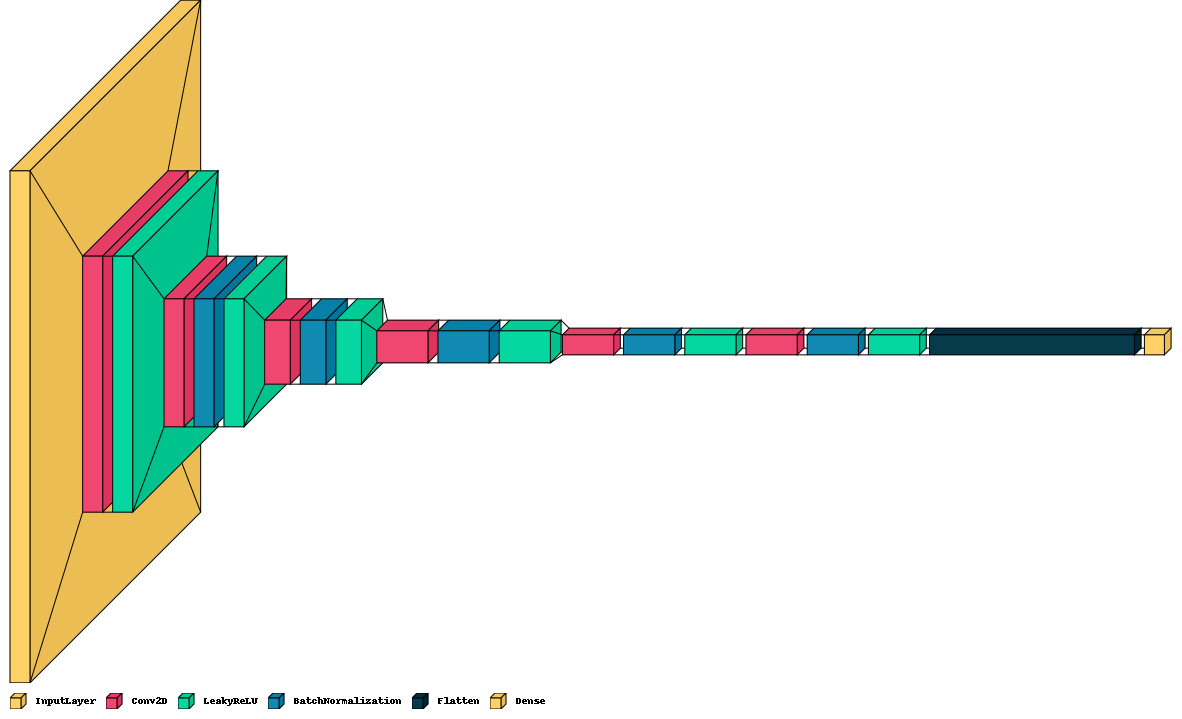

In [86]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(dlmodel, legend=True, to_file='model.png')

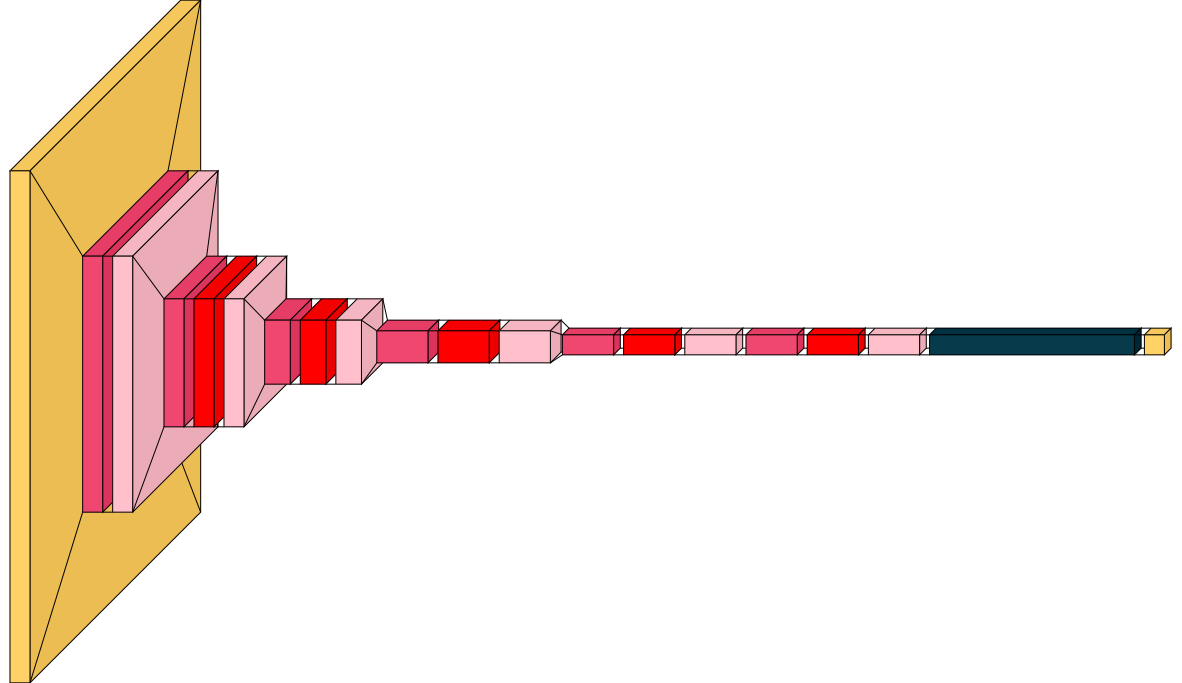

In [87]:
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from collections import defaultdict

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[BatchNormalization]['fill'] = 'red'
color_map[LeakyReLU]['fill'] = 'pink'
# color_map[ZeroPadding2D]['fill'] = 'gray'
# color_map[Dropout]['fill'] = 'pink'
# color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'teal'

visualkeras.layered_view(dlmodel, color_map=color_map)

In [93]:
def cconstruct_model(learningRate):
  smodel = Sequential()
  smodel.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(128, 128, 1), activation='relu'))
  smodel.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
  smodel.add(MaxPool2D((2, 2)))
  smodel.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  smodel.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  smodel.add(MaxPool2D((2, 2)))
  smodel.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
  smodel.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
  smodel.add(MaxPool2D((2, 2)))
  smodel.add(Flatten())
  smodel.add(Dense(256, activation='relu'))
  smodel.add(Dense(256, activation='relu'))
  smodel.add(Dense(12, activation='softmax'))
  optimizer = Adam(lr=learningRate)
  smodel.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  # smodel.summary()
  return smodel

model = cconstruct_model(0.001)
# print(model.summary())

In [95]:
# from ann_visualizer.visualize import ann_viz
# ann_viz(model, view=True, filename="cconstruct_model", title="CNN — Model 1 — Simple Architecture")
# plt.show()

In [92]:
# model3=cconstruct_model(0.009)
# import visualkeras
# from PIL import ImageFont
# visualkeras.layered_view(model3, legend=True)